# Import Libraries

In [57]:
import pandas as pd
import numpy as np
import re
import string
import nltk
!pip install emoji
import emoji
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
# Import word_tokenize
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
# Download punkt for word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Dataset

In [58]:
df = pd.read_csv('/content/cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


# Dataset Description

In [59]:
df.shape

(47692, 2)

In [60]:
df.isna().any()

,0
tweet_text,False
cyberbullying_type,False


In [61]:
df.isna().sum()

,0
tweet_text,0
cyberbullying_type,0


In [62]:
df.nunique()

,0
tweet_text,46017
cyberbullying_type,6


In [63]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
religion,7998
age,7992
gender,7973
ethnicity,7961
not_cyberbullying,7945
other_cyberbullying,7823


# Visualization

/tmp/ipython-input-1234295049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cyberbullying_type', order=df['cyberbullying_type'].value_counts().index, palette='Blues')


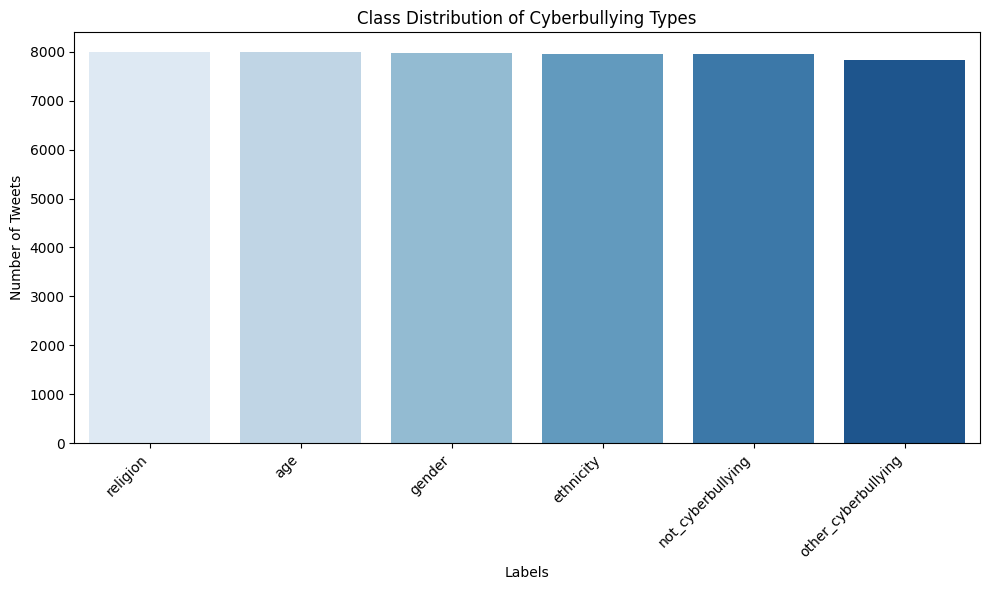

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cyberbullying_type', order=df['cyberbullying_type'].value_counts().index, palette='Blues')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

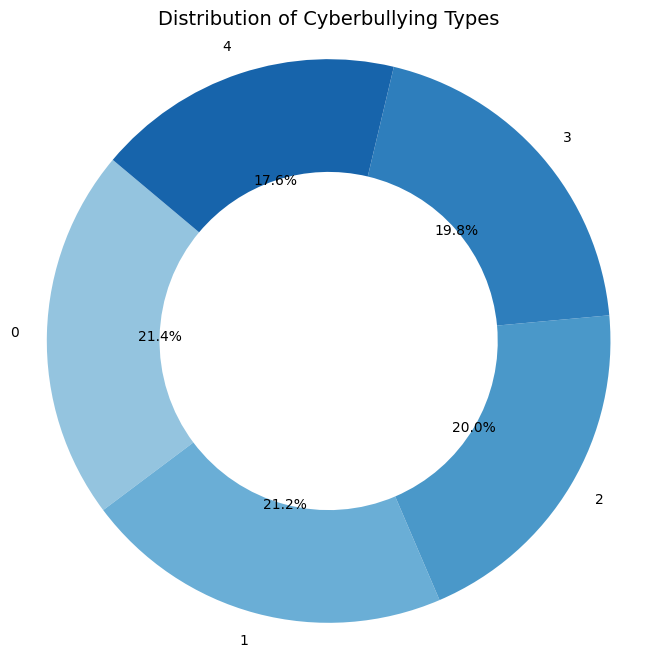

In [85]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Count the number of occurrences for each cyberbullying type
class_counts = df['cyberbullying_type'].value_counts()

# Use Blues colormap for the slices
colors = cm.Blues(np.linspace(0.4, 0.8, len(class_counts)))

# Plot donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Creates the donut effect
)

# Customize text appearance
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(10)

plt.title('Distribution of Cyberbullying Types', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the donut is circular
plt.show()


# Drop Class "Others_cyberbullying

In [65]:
bullying_type = ["religion","age","ethnicity","gender","not_cyberbullying"]
df = df[df['cyberbullying_type'].isin(bullying_type)]
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [66]:
df.isna().sum()

,0
tweet_text,0
cyberbullying_type,0


In [67]:
df.nunique()

,0
tweet_text,39774
cyberbullying_type,5


In [68]:
from nltk.tokenize import word_tokenize
import snowballstemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import spacy
from spacy import displacy
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# If you haven't downloaded these resources yet, run once:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
pip install spacy

In [70]:
import spacy
from spacy import displacy
from nltk.tokenize import word_tokenize

In [71]:
pip install contractions

In [16]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3c9c287a81196f11d4dbfe7258a8e09f24eadf04e6e23a5ac5775ca9a18385ad
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


# Dataset Cleaning

In [72]:
import re
import string
import emoji
import contractions # Assuming this library is intended for expanding contractions
from langdetect import detect, LangDetectException # Assuming this library is intended for language detection
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download punkt_tab

# Define stop words and lemmatizer globally or pass them to functions
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Assuming these functions are defined elsewhere and needed for clean_tweet
# If not, they need to be defined or removed.
# For now, I will add placeholders or assume they exist.

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_url_shorteners(text):
    # This is a basic example, more complex patterns might be needed
    return re.sub(r'(?:https?://)?(?:[a-zA-Z0-9.-]+\.)+[a-zA-Z]{2,6}(?:/[^\s]*)?', '', text)

def remove_spaces_tweets(text):
  # This function seems redundant with remove_extra_whitespace and the final strip
  return text

def remove_short_tweets(text, min_words=1):
  # This function seems like it should filter tweets, not clean text
  return text

# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespaces
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words
def lemmatize(text):
    words = nltk.word_tokenize(text) # Use nltk.word_tokenize
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

def lowercase(text):
    return str(text).lower()

# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = lowercase(tweet)
    # The following functions seem to be either redundant or intended for filtering, not cleaning
    # tweet = remove_extra_whitespace(tweet) # Redundant with remove_mult_spaces and final strip
    # tweet = remove_url_shorteners(tweet) # Already handled in strip_all_entities
    # tweet = remove_spaces_tweets(tweet) # Redundant
    # tweet = remove_short_tweets(tweet) # Filtering, not cleaning

    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [73]:
df['clean_text'] = [clean_tweet(tweet) for tweet in df['tweet_text']]
df

/tmp/ipython-input-1198168491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = [clean_tweet(tweet) for tweet in df['tweet_text']]


,tweet_text,cyberbullying_type,clean_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore or red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,this isis account pretending kurdish account l...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god this dumb nigger bitch got bleach ha...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt if you are nigger fucking unfollow...


# Drop Duplicates

In [74]:
df.drop_duplicates("clean_text", inplace=True)
df

/tmp/ipython-input-2266786132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates("clean_text", inplace=True)


,tweet_text,cyberbullying_type,clean_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore or red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,this isis account pretending kurdish account l...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god this dumb nigger bitch got bleach ha...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt if you are nigger fucking unfollow...


In [75]:
df['text_len'] = [len(text.split()) for text in df.clean_text]
df.sort_values(by=['text_len'], ascending=False)

/tmp/ipython-input-3933087382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = [len(text.split()) for text in df.clean_text]


,tweet_text,cyberbullying_type,clean_text,text_len
44035,You so black and white trying to live like a n...,ethnicity,you black white trying live like nigger pahaha...,184
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb as nigger bitch ltthis whore s...,172
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,researchers push import top antibullying progr...,145
33724,"... I don't feel guilty for killing him, I jus...",age,feel guilty killing feel guilty enjoyed he tor...,144
10922,don't make rape jokes!!! don't make gay jokes!...,gender,make rape joke make gay joke oh fat joke okay ...,128
...,...,...,...,...
16290,Iter 3:,religion,iter,1
11489,ð¶ð¶ð¶ whaâ¦,gender,wha,1
3645,I stand by @undergroundbby.,not_cyberbullying,stand,1
3229,@ForeverPeazer hahaha that's me!!,not_cyberbullying,hahaha,1


In [76]:
df['text_len'] = [len(text.split()) for text in df.clean_text]
df.sort_values(by=['text_len'], ascending=False)

/tmp/ipython-input-3933087382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = [len(text.split()) for text in df.clean_text]


,tweet_text,cyberbullying_type,clean_text,text_len
44035,You so black and white trying to live like a n...,ethnicity,you black white trying live like nigger pahaha...,184
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb as nigger bitch ltthis whore s...,172
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,researchers push import top antibullying progr...,145
33724,"... I don't feel guilty for killing him, I jus...",age,feel guilty killing feel guilty enjoyed he tor...,144
10922,don't make rape jokes!!! don't make gay jokes!...,gender,make rape joke make gay joke oh fat joke okay ...,128
...,...,...,...,...
16290,Iter 3:,religion,iter,1
11489,ð¶ð¶ð¶ whaâ¦,gender,wha,1
3645,I stand by @undergroundbby.,not_cyberbullying,stand,1
3229,@ForeverPeazer hahaha that's me!!,not_cyberbullying,hahaha,1


# Drop Rows that contain more than 100 words

In [77]:
df = df[(df['clean_text'].str.split().str.len() <= 100)]
df

,tweet_text,cyberbullying_type,clean_text,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in word food crapilicious,4
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why white,2
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore or red velvet cupcake,6
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,this isis account pretending kurdish account l...,9
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...,22
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,29
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god this dumb nigger bitch got bleach ha...,14
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt if you are nigger fucking unfollow...,13


In [78]:
mapping = {
    'religion': 0,
    'age': 1,
    'ethnicity': 2,
    'gender': 3,
    'not_cyberbullying': 4,
}

df['cyberbullying_type'] = df['cyberbullying_type'].map(mapping)

/tmp/ipython-input-2030613455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cyberbullying_type'] = df['cyberbullying_type'].map(mapping)


# Word Count

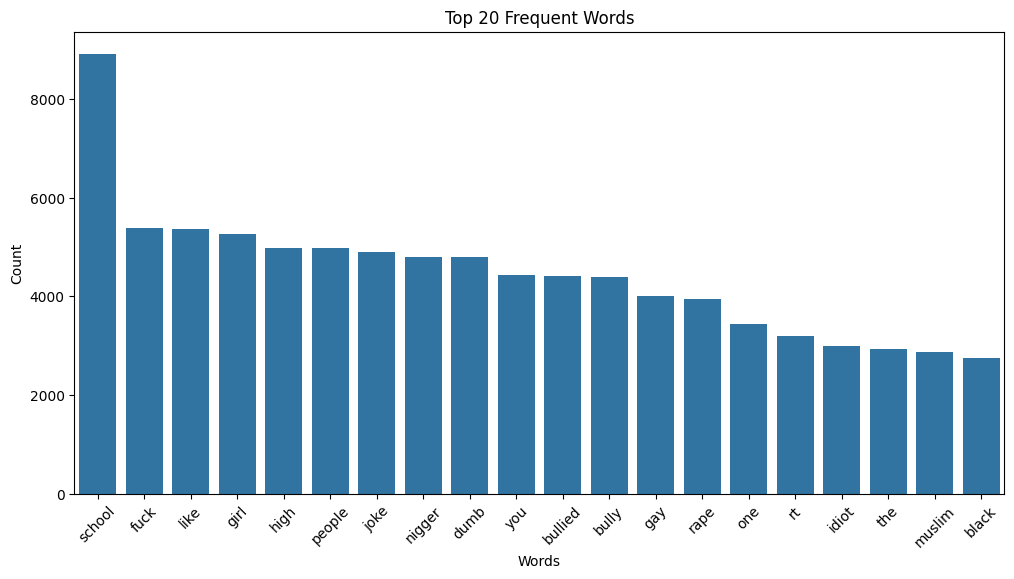

In [79]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine all text into a single string
all_words = ' '.join(df['clean_text'])  # Replace with your column name

# Count word frequency
word_freq = Counter(all_words.split())

# Get top 20 words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))  # ✅ Force single color
plt.title('Top 20 Frequent Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [80]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
0,7922
1,7863
2,7425
3,7357
4,6531


# Word Cloud

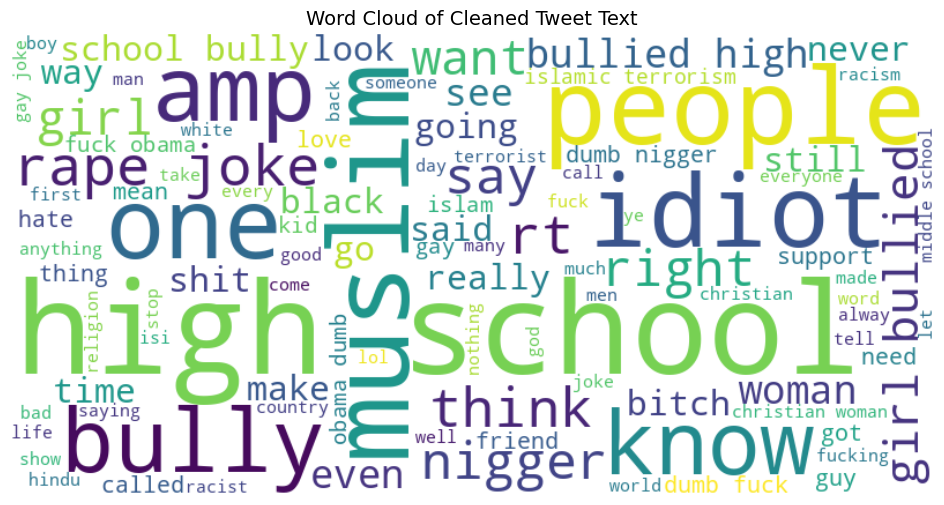

In [81]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the 'clean_text' column for the word cloud as it contains the processed text
# Combine all text into a single string
text_data = " ".join(df['clean_text'].astype(str))

# Create word cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100 # Adjust as needed to show more or fewer words
).generate(text_data)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Tweet Text", fontsize=14) # Update title
plt.show()

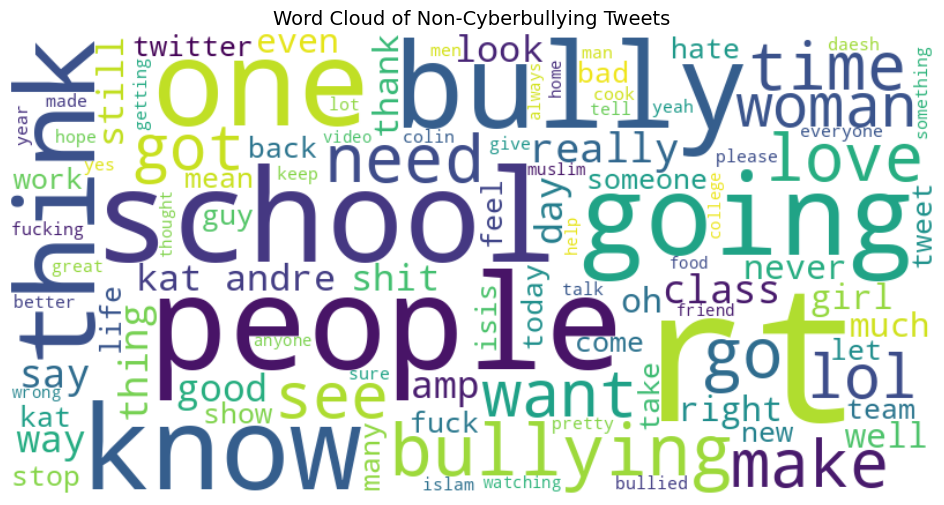

In [88]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter dataset for 'not_bullying' tweets using the numerical label (4)
not_bullying_df = df[df['cyberbullying_type'] == 4]

# Combine all cleaned text into a single string
text_data = " ".join(not_bullying_df['clean_text'].astype(str))

# Create word cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100  # Adjust as needed
).generate(text_data)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Non-Cyberbullying Tweets", fontsize=14)
plt.show()

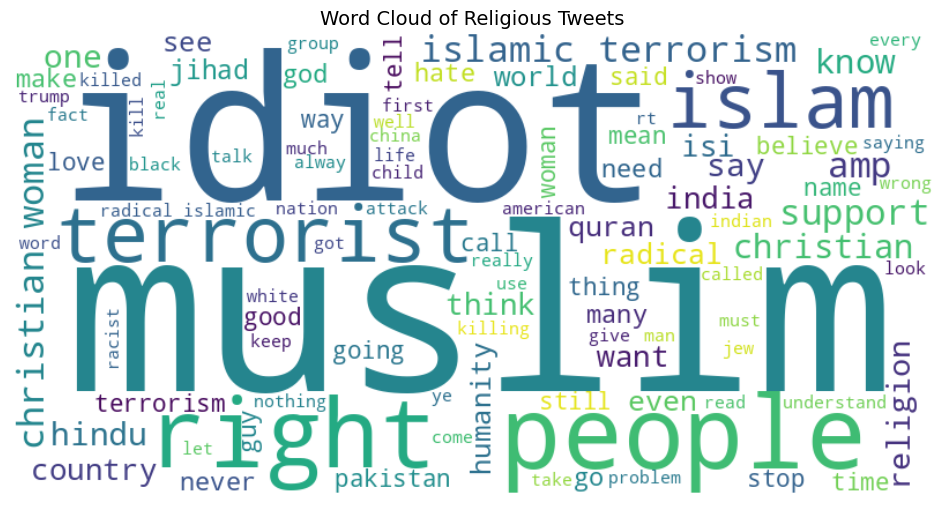

In [90]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter dataset for 'not_bullying' tweets using the numerical label (4)
not_bullying_df = df[df['cyberbullying_type'] == 0]

# Combine all cleaned text into a single string
text_data = " ".join(not_bullying_df['clean_text'].astype(str))

# Create word cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100  # Adjust as needed
).generate(text_data)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Religious Tweets", fontsize=14)
plt.show()

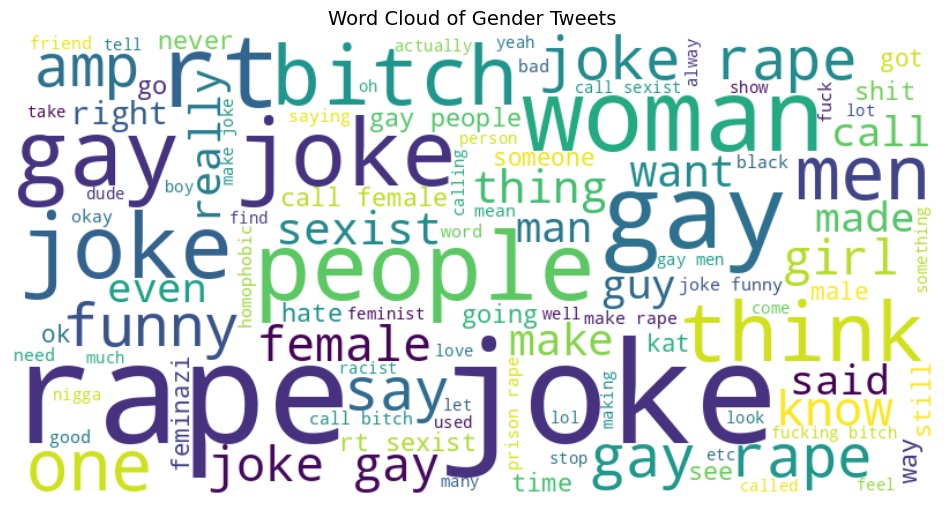

In [91]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter dataset for 'not_bullying' tweets using the numerical label (4)
not_bullying_df = df[df['cyberbullying_type'] == 3]

# Combine all cleaned text into a single string
text_data = " ".join(not_bullying_df['clean_text'].astype(str))

# Create word cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100  # Adjust as needed
).generate(text_data)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Gender Tweets", fontsize=14)
plt.show()

# Final DataFrame

In [92]:
df=df[['clean_text','cyberbullying_type']]
df

,clean_text,cyberbullying_type
0,in word food crapilicious,4
1,why white,4
2,classy whore or red velvet cupcake,4
3,meh thanks head concerned another angry dude t...,4
4,this isis account pretending kurdish account l...,4
...,...,...
47687,black people expected anything depended anythi...,2
47688,turner withhold disappointment turner called c...,2
47689,swear god this dumb nigger bitch got bleach ha...,2
47690,yea fuck rt if you are nigger fucking unfollow...,2


# Model Implementation

**SVM, Naive Bayes, Random Forest**

In [27]:
# =======================
# Setup & Utilities
# =======================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

# =======================
# Split (Stratified)
# =======================
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=RANDOM_STATE, stratify=df['cyberbullying_type']
)
train_df, val_df = train_test_split(
    train_df, test_size=0.2, random_state=RANDOM_STATE, stratify=train_df['cyberbullying_type']
)

print(f"Train: {train_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")

# =======================
# TF-IDF Vectorization
# =======================
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_features=200_000)
X_train_tfidf = tfidf.fit_transform(train_df['clean_text'])
X_val_tfidf   = tfidf.transform(val_df['clean_text'])
X_test_tfidf  = tfidf.transform(test_df['clean_text'])

y_train = train_df['cyberbullying_type'].values
y_val   = val_df['cyberbullying_type'].values
y_test  = test_df['cyberbullying_type'].values

# =======================
# SMOTE Balancing
# =======================
sm = SMOTE(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = sm.fit_resample(X_train_tfidf, y_train)
print("After SMOTE:", np.bincount(y_train_bal))

# =======================
# Model Evaluation Function
# =======================
def eval_and_print(name, model, X_tr, y_tr, X_va, y_va, X_te, y_te):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    acc = accuracy_score(y_te, preds)
    print(f"\n{name} — Test Accuracy: {acc:.4f}")
    print(classification_report(y_te, preds, digits=4))

# =======================
# Train & Evaluate Models
# =======================
nb = MultinomialNB(alpha=0.5)
eval_and_print("MultinomialNB", nb, X_train_bal, y_train_bal, X_val_tfidf, y_val, X_test_tfidf, y_test)

svm_clf = LinearSVC()
eval_and_print("LinearSVC", svm_clf, X_train_bal, y_train_bal, X_val_tfidf, y_val, X_test_tfidf, y_test)

rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
)
eval_and_print("RandomForest", rf, X_train_bal, y_train_bal, X_val_tfidf, y_val, X_test_tfidf, y_test)


Train: (23739, 2), Val: (5935, 2), Test: (7419, 2)
After SMOTE: [5066 5066 5066 5066 5066]

MultinomialNB — Test Accuracy: 0.8562
              precision    recall  f1-score   support

           0     0.8362    0.9678    0.8972      1583
           1     0.8536    0.9746    0.9101      1573
           2     0.8989    0.9279    0.9132      1485
           3     0.8806    0.8387    0.8591      1469
           4     0.7881    0.5172    0.6245      1309

    accuracy                         0.8562      7419
   macro avg     0.8515    0.8452    0.8408      7419
weighted avg     0.8528    0.8562    0.8475      7419


LinearSVC — Test Accuracy: 0.9237
              precision    recall  f1-score   support

           0     0.9564    0.9551    0.9558      1583
           1     0.9564    0.9758    0.9660      1573
           2     0.9734    0.9859    0.9796      1485
           3     0.9125    0.8666    0.8890      1469
           4     0.8013    0.8167    0.8089      1309

    accuracy        

**Confusion Matrix**


MultinomialNB — Test Accuracy: 0.8562
              precision    recall  f1-score   support

           0     0.8362    0.9678    0.8972      1583
           1     0.8536    0.9746    0.9101      1573
           2     0.8989    0.9279    0.9132      1485
           3     0.8806    0.8387    0.8591      1469
           4     0.7881    0.5172    0.6245      1309

    accuracy                         0.8562      7419
   macro avg     0.8515    0.8452    0.8408      7419
weighted avg     0.8528    0.8562    0.8475      7419



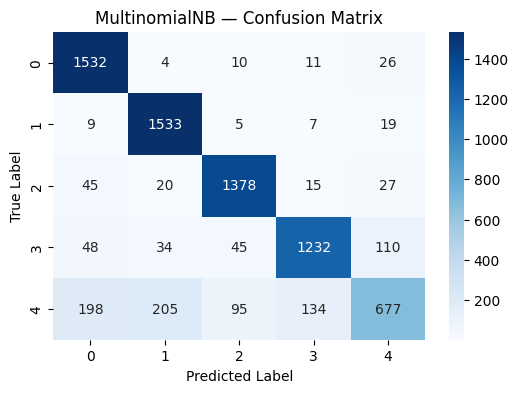


LinearSVC — Test Accuracy: 0.9237
              precision    recall  f1-score   support

           0     0.9564    0.9551    0.9558      1583
           1     0.9564    0.9758    0.9660      1573
           2     0.9734    0.9859    0.9796      1485
           3     0.9125    0.8666    0.8890      1469
           4     0.8013    0.8167    0.8089      1309

    accuracy                         0.9237      7419
   macro avg     0.9200    0.9200    0.9199      7419
weighted avg     0.9238    0.9237    0.9236      7419



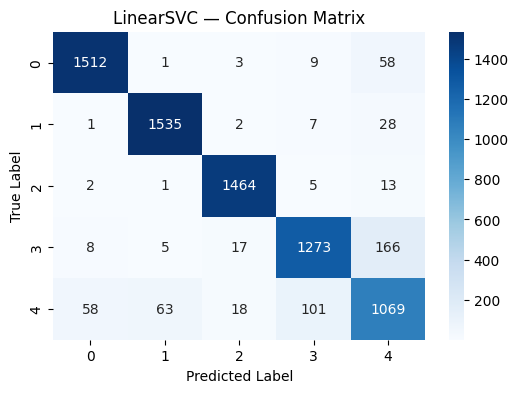


RandomForest — Test Accuracy: 0.9253
              precision    recall  f1-score   support

           0     0.9651    0.9425    0.9537      1583
           1     0.9813    0.9688    0.9750      1573
           2     0.9898    0.9798    0.9848      1485
           3     0.9476    0.8244    0.8817      1469
           4     0.7525    0.9037    0.8212      1309

    accuracy                         0.9253      7419
   macro avg     0.9273    0.9239    0.9233      7419
weighted avg     0.9325    0.9253    0.9268      7419



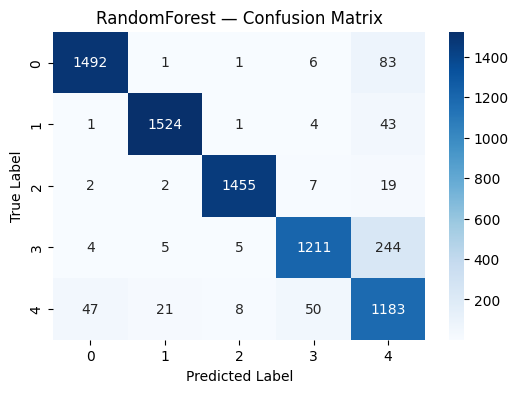

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def eval_and_print(name, model, X_tr, y_tr, X_va, y_va, X_te, y_te):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    acc = accuracy_score(y_te, preds)
    print(f"\n{name} — Test Accuracy: {acc:.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(df['cyberbullying_type'].unique()),
                yticklabels=sorted(df['cyberbullying_type'].unique()))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} — Confusion Matrix")
    plt.show()

# Re-run your models with the updated eval function
nb = MultinomialNB(alpha=0.5)
eval_and_print("MultinomialNB", nb, X_train_bal, y_train_bal, X_val_tfidf, y_val, X_test_tfidf, y_test)

svm_clf = LinearSVC()
eval_and_print("LinearSVC", svm_clf, X_train_bal, y_train_bal, X_val_tfidf, y_val, X_test_tfidf, y_test)

rf = RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE)
eval_and_print("RandomForest", rf, X_train_bal, y_train_bal, X_val_tfidf, y_val, X_test_tfidf, y_test)


**AUC-ROC Curve for Random Forest**

Train Accuracy: 0.9999
Validation Accuracy: 0.9245


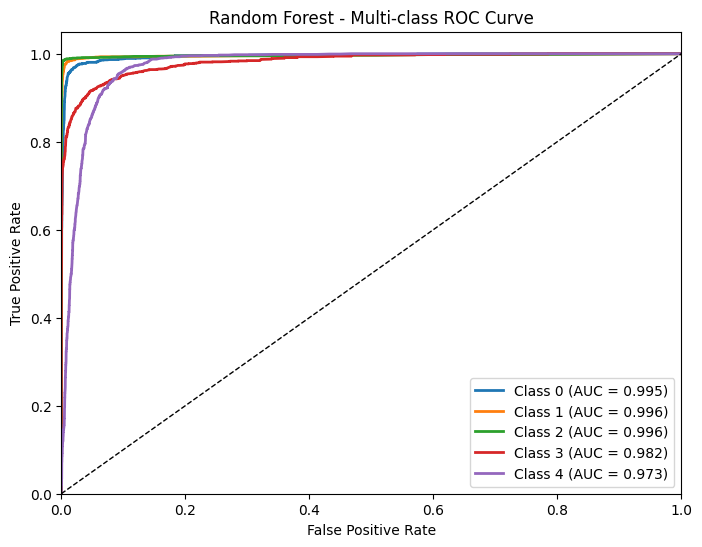

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
)
rf.fit(X_train_bal, y_train_bal)

# Train & validation accuracy
train_acc = rf.score(X_train_bal, y_train_bal)
val_acc = rf.score(X_val_tfidf, y_val)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Predict probabilities for test set
y_score = rf.predict_proba(X_test_tfidf)

# One-hot encode the test labels for AUC computation
y_test_bin = label_binarize(y_test, classes=np.unique(y_train_bal))
n_classes = y_test_bin.shape[1]

# Compute AUC-ROC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.show()

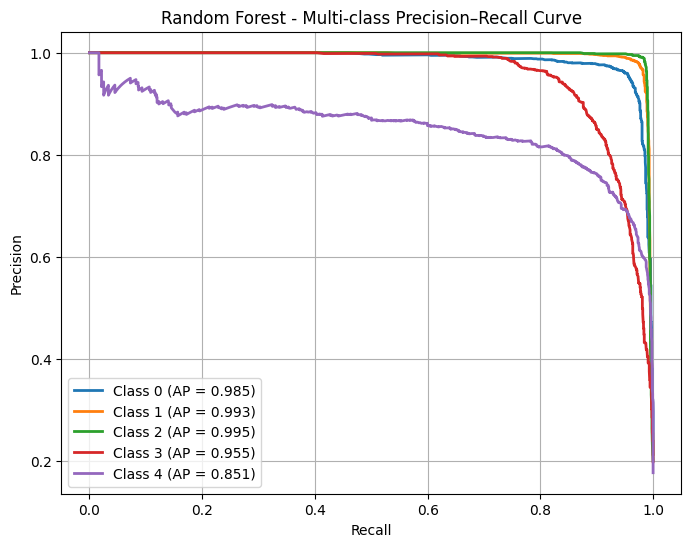

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall for each class
precision = {}
recall = {}
avg_precision = {}

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2,
             label=f"Class {i} (AP = {avg_precision[i]:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Random Forest - Multi-class Precision–Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


**Soft Voting**


Hybrid Model (Soft Voting) — Test Accuracy: 0.9248
              precision    recall  f1-score   support

           0     0.9479    0.9646    0.9562      1583
           1     0.9497    0.9835    0.9663      1573
           2     0.9740    0.9832    0.9786      1485
           3     0.9222    0.8639    0.8921      1469
           4     0.8113    0.8083    0.8098      1309

    accuracy                         0.9248      7419
   macro avg     0.9210    0.9207    0.9206      7419
weighted avg     0.9243    0.9248    0.9243      7419



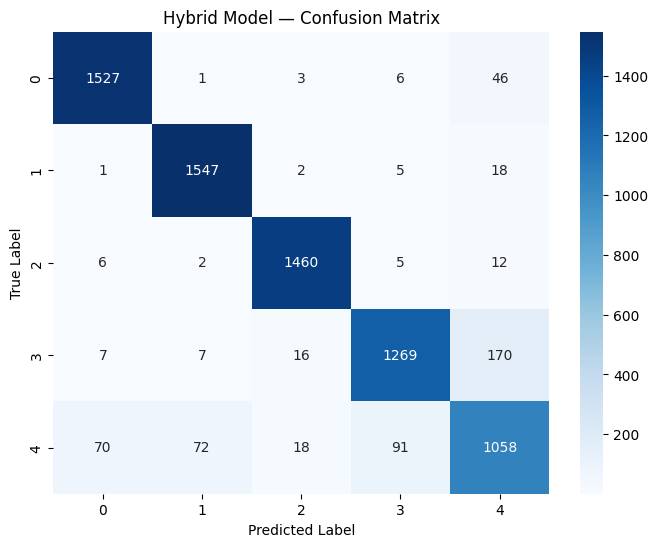

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 0️⃣ Data Split
# ==============================================
# Example: Adjust RANDOM_STATE as needed
RANDOM_STATE = 42

train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=RANDOM_STATE, stratify=df['cyberbullying_type']
)
train_df, val_df = train_test_split(
    train_df, test_size=0.2, random_state=RANDOM_STATE, stratify=train_df['cyberbullying_type']
)

# If you have already balanced training data using SMOTE or another method:
# train_bal = your balanced version of train_df
train_bal = train_df  # (replace with balanced data if you have it)

# ==============================================
# 1️⃣ TF-IDF Vectorization
# ==============================================
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),      # unigrams + bigrams
    max_features=80000,      # large feature space
    sublinear_tf=True        # sublinear term frequency scaling
)

X_train_tfidf = vectorizer.fit_transform(train_bal['clean_text'])
X_val_tfidf = vectorizer.transform(val_df['clean_text'])
X_test_tfidf = vectorizer.transform(test_df['clean_text'])

y_train_bal = train_bal['cyberbullying_type']
y_val = val_df['cyberbullying_type']
y_test = test_df['cyberbullying_type']

# ==============================================
# 2️⃣ Base Models
# ==============================================
nb = MultinomialNB(alpha=0.3)
svm_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000), method='sigmoid', cv=5)
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=3,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# ==============================================
# 3️⃣ Soft Voting Ensemble
# ==============================================
voting_clf = VotingClassifier(
    estimators=[
        ('nb', nb),
        ('svm', svm_clf),
        ('rf', rf)
    ],
    voting='soft',  # probability averaging
    n_jobs=-1
)

# ==============================================
# 4️⃣ Train & Evaluate
# ==============================================
voting_clf.fit(X_train_tfidf, y_train_bal)
preds = voting_clf.predict(X_test_tfidf)

acc = accuracy_score(y_test, preds)
print(f"\nHybrid Model (Soft Voting) — Test Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, digits=4))

# ==============================================
# 5️⃣ Confusion Matrix
# ==============================================
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=sorted(df['cyberbullying_type'].unique()),
    yticklabels=sorted(df['cyberbullying_type'].unique())
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Hybrid Model — Confusion Matrix")
plt.show()


# Stacking Hybrid Model

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:38:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Stacking Hybrid Model — Test Accuracy: 0.9288
              precision    recall  f1-score   support

           0     0.9577    0.9583    0.9580      1583
           1     0.9870    0.9657    0.9762      1573
           2     0.9918    0.9798    0.9858      1485
           3     0.9037    0.8754    0.8893      1469
           4     0.7923    0.8510    0.8206      1309

    accuracy                         0.9288      7419
   macro avg     0.9265    0.9260    0.9260      7419
weighted avg     0.9309    0.9288    0.9296      7419



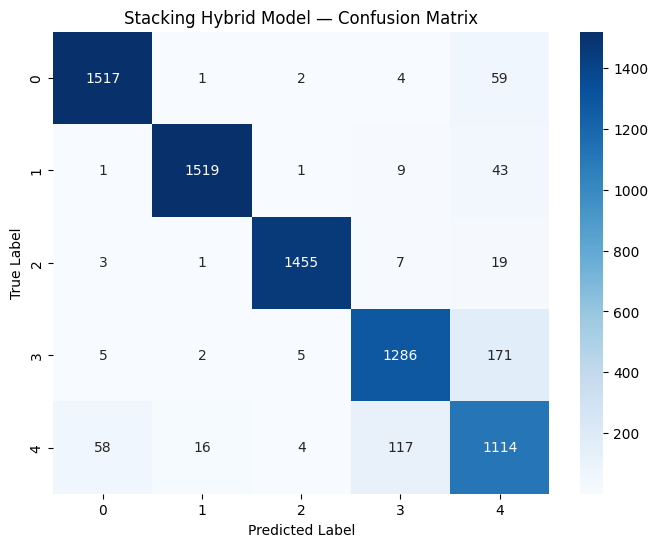

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 0️⃣ Data Split
# ==============================================
RANDOM_STATE = 42

train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=RANDOM_STATE, stratify=df['cyberbullying_type']
)
train_df, val_df = train_test_split(
    train_df, test_size=0.2, random_state=RANDOM_STATE, stratify=train_df['cyberbullying_type']
)

train_bal = train_df  # replace with SMOTE balanced data if available

# ==============================================
# 1️⃣ TF-IDF Vectorization
# ==============================================
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=80000,
    sublinear_tf=True
)

X_train_tfidf = vectorizer.fit_transform(train_bal['clean_text'])
X_val_tfidf = vectorizer.transform(val_df['clean_text'])
X_test_tfidf = vectorizer.transform(test_df['clean_text'])

y_train_bal = train_bal['cyberbullying_type']
y_val = val_df['cyberbullying_type']
y_test = test_df['cyberbullying_type']

# ==============================================
# 2️⃣ Base Models
# ==============================================
nb = MultinomialNB(alpha=0.3)
svm_clf = CalibratedClassifierCV(LinearSVC(max_iter=1000), method='sigmoid', cv=5)
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=3,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# ==============================================
# 3️⃣ Meta Learner (XGBoost)
# ==============================================
xgb_clf = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# ==============================================
# 4️⃣ Stacking Ensemble
# ==============================================
stacking_clf = StackingClassifier(
    estimators=[('nb', nb), ('svm', svm_clf), ('rf', rf)],
    final_estimator=xgb_clf,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# ==============================================
# 5️⃣ Train & Evaluate
# ==============================================
stacking_clf.fit(X_train_tfidf, y_train_bal)
preds = stacking_clf.predict(X_test_tfidf)

acc = accuracy_score(y_test, preds)
print(f"\nStacking Hybrid Model — Test Accuracy: {acc:.4f}")
print(classification_report(y_test, preds, digits=4))

# ==============================================
# 6️⃣ Confusion Matrix
# ==============================================
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=sorted(df['cyberbullying_type'].unique()),
    yticklabels=sorted(df['cyberbullying_type'].unique())
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Stacking Hybrid Model — Confusion Matrix")
plt.show()


**AUC-ROC Curve**

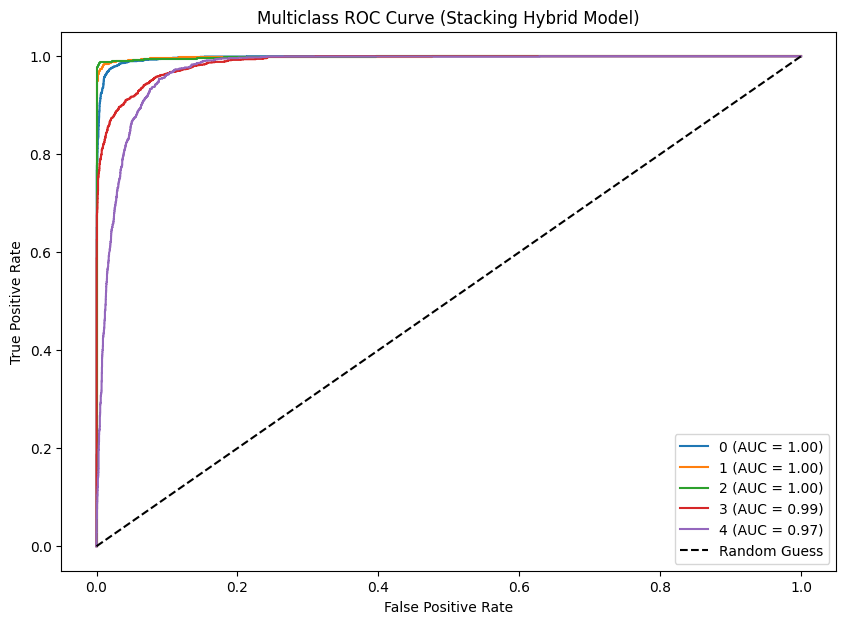

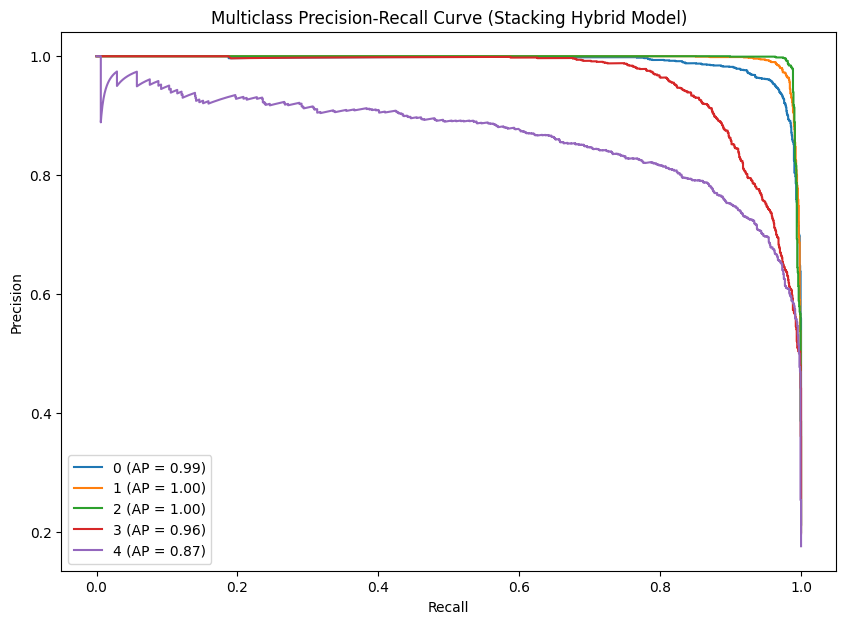

In [43]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# ==============================================
# 🔹 AUC-ROC Curve (One-vs-Rest for Multiclass)
# ==============================================
y_test_bin = label_binarize(y_test, classes=sorted(df['cyberbullying_type'].unique()))
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = stacking_clf.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{sorted(df['cyberbullying_type'].unique())[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (Stacking Hybrid Model)")
plt.legend(loc="lower right")
plt.show()

# ==============================================
# 🔹 Precision-Recall Curve (One-vs-Rest)
# ==============================================
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label=f"{sorted(df['cyberbullying_type'].unique())[i]} (AP = {avg_precision[i]:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision-Recall Curve (Stacking Hybrid Model)")
plt.legend(loc="lower left")
plt.show()


# LSTM

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# 1️⃣ Balance dataset by upsampling (NOT SMOTE)
train_bal = (
    train_df
    .groupby('cyberbullying_type', group_keys=False)
    .apply(lambda x: x.sample(train_df['cyberbullying_type'].value_counts().max(), replace=True, random_state=RANDOM_STATE))
    .sample(frac=1.0, random_state=RANDOM_STATE)
    .reset_index(drop=True)
)

# 2️⃣ Tokenizer — fit on balanced set
max_words = 60000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_bal['clean_text'])

# Convert to padded sequences
X_train_lstm = tokenizer.texts_to_sequences(train_bal['clean_text'])
X_train_lstm = pad_sequences(X_train_lstm, maxlen=max_len, padding='post', truncating='post')

X_test_lstm = tokenizer.texts_to_sequences(test_df['clean_text'])
X_test_lstm = pad_sequences(X_test_lstm, maxlen=max_len, padding='post', truncating='post')

# 3️⃣ Encode labels after balancing
num_classes = df['cyberbullying_type'].nunique()
y_train_lstm_cat = to_categorical(train_bal['cyberbullying_type'], num_classes)
y_test_lstm_cat = to_categorical(test_df['cyberbullying_type'], num_classes)

# 4️⃣ Build a stronger LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5️⃣ Train
history = model.fit(
    X_train_lstm, y_train_lstm_cat,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

# 6️⃣ Evaluate
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm_cat, verbose=0)
print(f"LSTM Test Accuracy: {accuracy:.4f}")


/tmp/ipython-input-4101119791.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(train_df['cyberbullying_type'].value_counts().max(), replace=True, random_state=RANDOM_STATE))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 512s 3s/step - accuracy: 0.6020 - loss: 0.9812 - val_accuracy: 0.9376 - val_loss: 0.2006
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9517 - loss: 0.1588 - val_accuracy: 0.9534 - val_loss: 0.1447
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 576s 3s/step - accuracy: 0.9758 - loss: 0.0817 - val_accuracy: 0.9542 - val_loss: 0.1467
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 596s 3s/step - accuracy: 0.9862 - loss: 0.0477 - val_accuracy: 0.9546 - val_loss: 0.1566
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 516s 3s/step - accuracy: 0.9900 - loss: 0.0341 - val_accuracy: 0.9621 - val_loss: 0.1500
LSTM Test Accuracy: 0.9082


# BiLSTM + Attention

In [ ]:
from tensorflow.keras.layers import Layer, Input, Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
import tensorflow as tf

# Custom Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# Input layer
inputs = Input(shape=(max_len,))

# Embedding layer
embedding = Embedding(max_words, 128, input_length=max_len)(inputs)

# BiLSTM layer (return sequences for Attention)
bilstm = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(embedding)

# Attention layer
attention = AttentionLayer()(bilstm)

# Fully connected layer
dense = Dense(128, activation='relu')(attention)
dropout = Dropout(0.4)(dense)

# Output layer
outputs = Dense(num_classes, activation='softmax')(dropout)

# Build model
model_att = Model(inputs=inputs, outputs=outputs)

# Compile
model_att.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history_att = model_att.fit(
    X_train_lstm, y_train_lstm_cat,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

# Evaluate
loss, accuracy = model_att.evaluate(X_test_lstm, y_test_lstm_cat, verbose=0)
print(f"BiLSTM + Attention Test Accuracy: {accuracy:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


179/179 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.2854 - loss: 1.4892 - val_accuracy: 0.8884 - val_loss: 0.3467
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9061 - loss: 0.2952 - val_accuracy: 0.9259 - val_loss: 0.2240
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9406 - loss: 0.1805 - val_accuracy: 0.9527 - val_loss: 0.1652
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9687 - loss: 0.1126 - val_accuracy: 0.9531 - val_loss: 0.1552
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9809 - loss: 0.0730 - val_accuracy: 0.9558 - val_loss: 0.1712
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9836 - loss: 0.0601 - val_accuracy: 0.9570 - val_loss: 0.1789
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9884 - loss: 0.0421 - val_accuracy: 0.9562 - val_loss: 0.1857
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9924 - loss: 0.0273 - val_accuracy: 0.957

232/232 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step


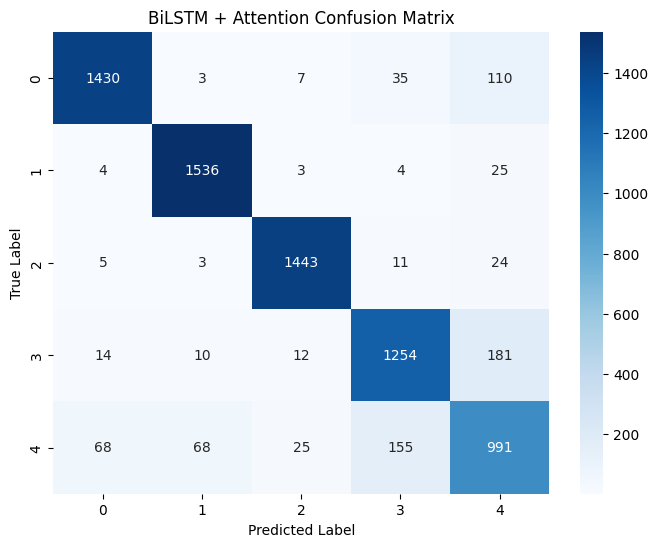

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1585
           1       0.95      0.98      0.96      1572
           2       0.97      0.97      0.97      1486
           3       0.86      0.85      0.86      1471
           4       0.74      0.76      0.75      1307

    accuracy                           0.90      7421
   macro avg       0.89      0.89      0.89      7421
weighted avg       0.90      0.90      0.90      7421



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Predict class probabilities
y_pred_probs = model.predict(X_test_lstm)

# 2️⃣ Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_lstm_cat, axis=1)

# 3️⃣ Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 4️⃣ Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes),
            yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("BiLSTM + Attention Confusion Matrix")
plt.show()

# 5️⃣ Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

/tmp/ipython-input-2365851075.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Model", y="Accuracy", data=df, palette="viridis")


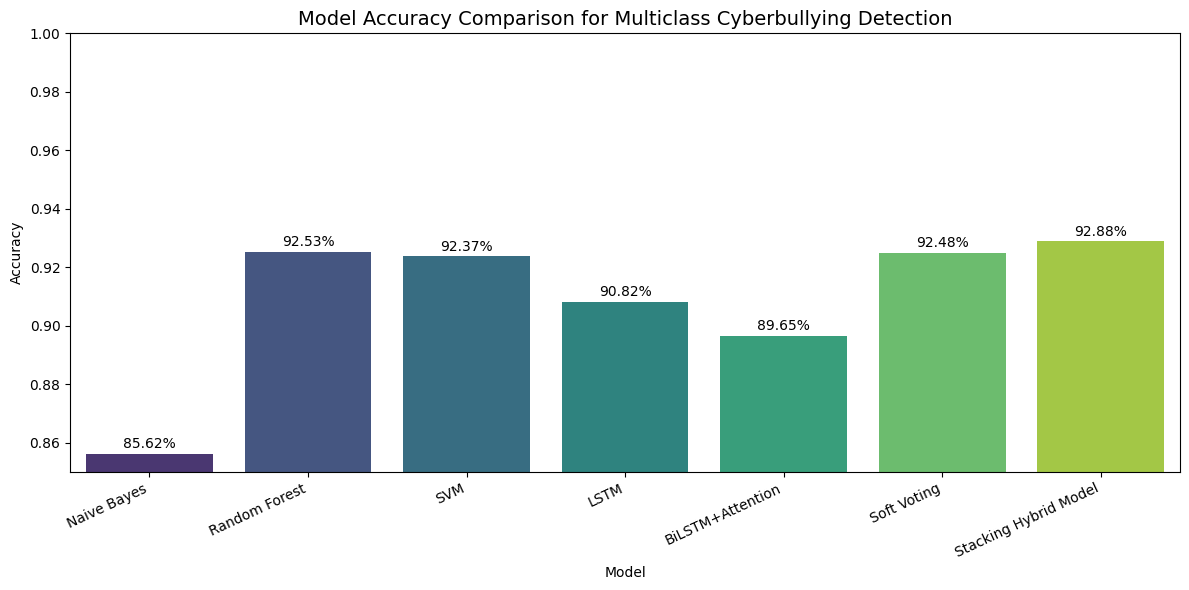

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance results
results = {
    "Model": [
        "Naive Bayes",
        "Random Forest",
        "SVM",
        "LSTM",
        "BiLSTM+Attention",
        "Soft Voting",
        "Stacking Hybrid Model"
    ],
    "Accuracy": [0.8562, 0.9253, 0.9237, 0.9082, 0.8965, 0.9248, 0.9288]
}

df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x="Model", y="Accuracy", data=df, palette="viridis")
plt.xticks(rotation=25, ha="right")
plt.ylim(0.85, 1.0)
plt.title("Model Accuracy Comparison for Multiclass Cyberbullying Detection", fontsize=14)
plt.ylabel("Accuracy")
plt.xlabel("Model")

# Add percentage annotations on top of each bar
for idx, row in df.iterrows():
    barplot.text(
        idx,
        row.Accuracy + 0.002,  # Slightly above the bar
        f"{row.Accuracy*100:.2f}%",
        color='black',
        ha="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()
